In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
def fspl(d, f, ple):
    return 10*ple*np.log(d)/np.log(10) + 20*np.log(f)/np.log(10) + 20*np.log(4*np.pi*1000000000/300000000)/np.log(10)

In [15]:
  
# low_band = [600000000, 1000000000, 10000000]  #600 MHz–1 GHz
# c_band = [3700000000, 4200000000, 10000000 ]  # 3.7–4.2 GHz
# mmwave = [24000000000, 47000000000, 50000000]  # 24–47 GHz
paper1 = [2000000000, 2100000000, 10000000]
paper2 = [10000000000, 10100000000, 10000000]
paper3 = [18000000000, 18100000000, 10000000]
paper4 = [28000000000, 28100000000, 10000000]
paper5 = [38000000000, 38100000000, 10000000]

distance = [74, 1238]
for i in [ paper1, paper2, paper3, paper4, paper5]:
    for j in range(i[0], i[1], i[2]):
        #for d in range(distance[0], distance[1]):
            print(j, distance[0], fspl(distance[0], j, 2.8))
            print(j, distance[1], fspl(distance[1], j, 2.8))

2000000000 74 270.80086025179565
2000000000 1238 305.0585501504831
2010000000 74 270.8441814869258
2010000000 1238 305.10187138561326
2020000000 74 270.8872877274485
2020000000 1238 305.1449776261359
2030000000 74 270.93018109678025
2030000000 1238 305.1878709954677
2040000000 74 270.97286368703396
2040000000 1238 305.23055358572145
2050000000 74 271.01533755963106
2050000000 1238 305.2730274583185
2060000000 74 271.057604745899
2060000000 1238 305.31529464458646
2070000000 74 271.09966724765434
2070000000 1238 305.35735714634177
2080000000 74 271.14152703777125
2080000000 1238 305.3992169364587
2090000000 74 271.18318606073706
2090000000 1238 305.44087595942455
10000000000 74 284.78026033851603
10000000000 1238 319.03795023720346
10010000000 74 284.7889418881024
10010000000 1238 319.0466317867898
10020000000 74 284.7976147691406
10020000000 1238 319.055304667828
10030000000 74 284.80627899892437
10030000000 1238 319.0639688976118
10040000000 74 284.81493459469596
10040000000 1238 319.

In [16]:
#1 rb per user, 1 rb = 15k * 12 subcarrier
#numerology 0 - 275 rb, n1 2110 – 2170 mhz band, 50mhz bw
from scipy.stats import norm
distance = 74 # 1238
def cal_prob(sigma, alpha, ):
    rssi = fspl(distance, 211*15000+2110000000, 2.8)
    results = {}
    for p_prime in range(int(rssi-100), int(rssi*2)):
        p1 = norm(0, sigma).cdf(p_prime*(1-alpha)-rssi)
        p2 = norm(0,sigma).cdf(p_prime*(1+alpha)-rssi)
        results[p_prime] = p2-p1
    return results

In [17]:
a01 = cal_prob(3.5,0.01)
a02 = cal_prob(3.5,0.02)
a05 = cal_prob(3.5,0.05)
a005 = cal_prob(3.5,0.005)

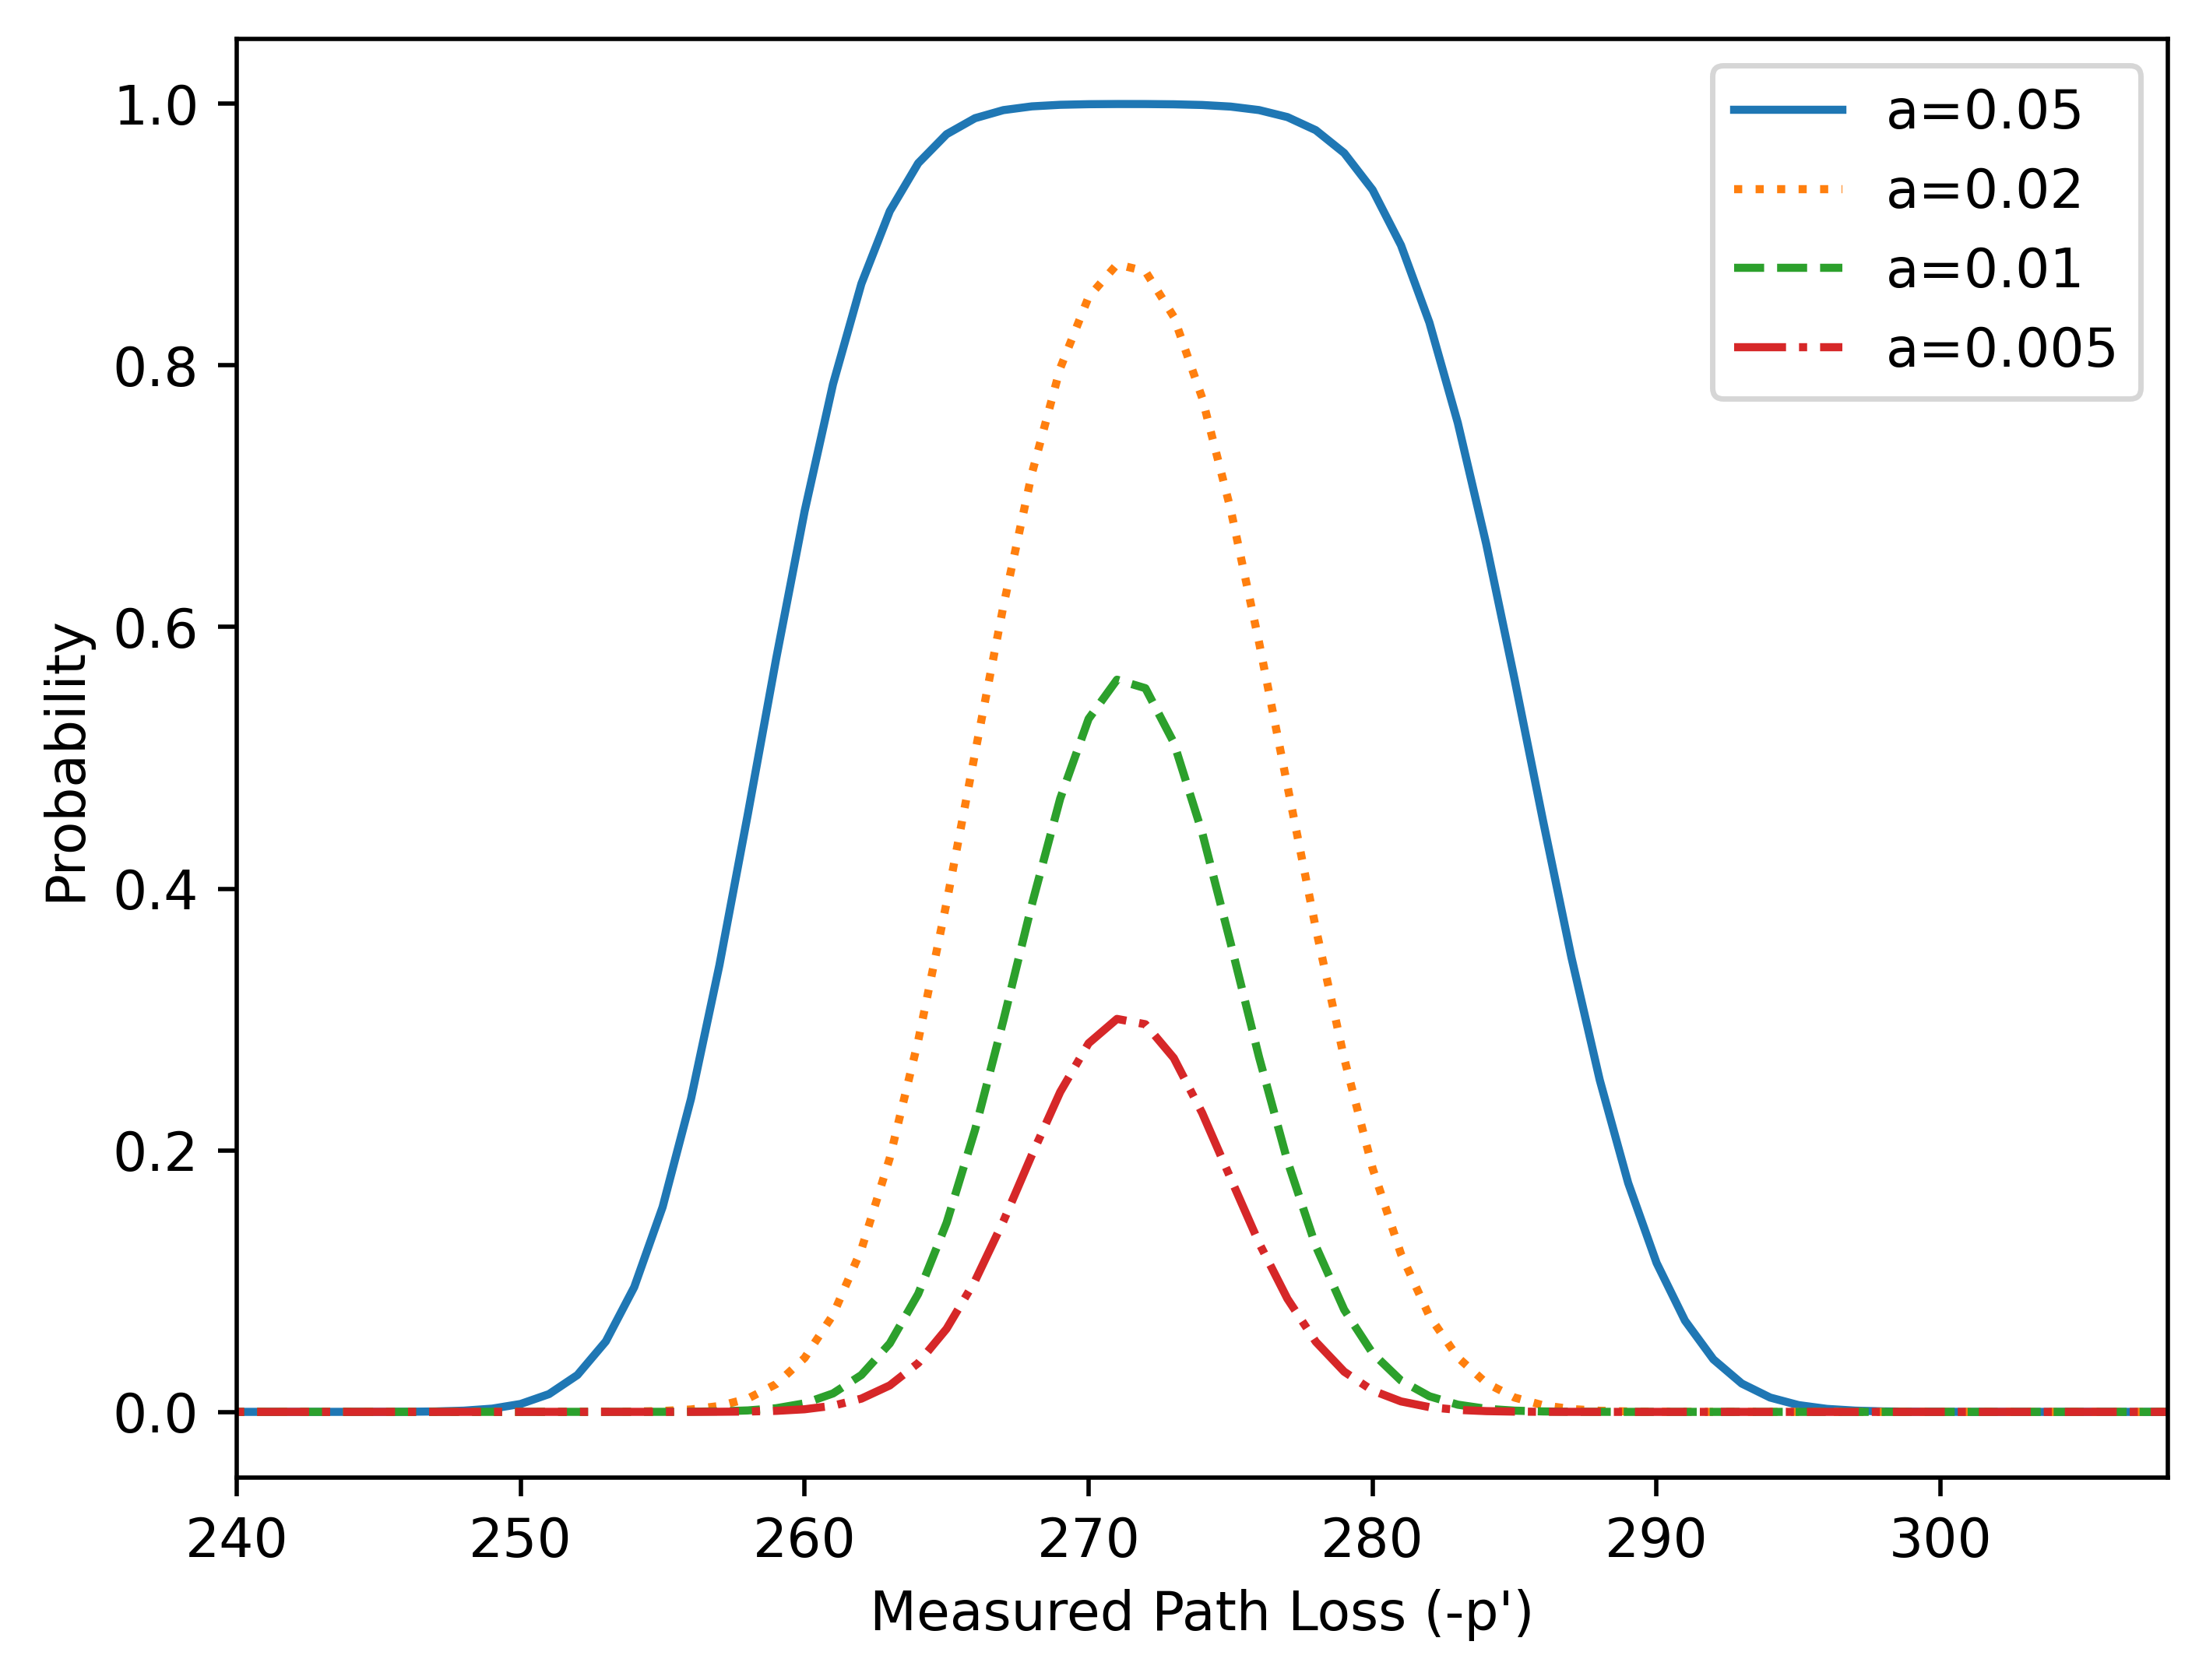

In [18]:
fig = plt.figure(dpi=500)
plt.xlabel("Measured Path Loss (-p')")
plt.ylabel("Probability")
plt.xlim([240,308])
plt.plot(a05.keys(), a05.values(),  label='a=0.05' )
plt.plot(a02.keys(), a02.values(),  label='a=0.02',linestyle='dotted')
plt.plot(a01.keys(), a01.values(), label='a=0.01',linestyle='dashed')
plt.plot(a005.keys(), a005.values(), label='a=0.005',linestyle='dashdot')
plt.legend()
fig.savefig('alpha.pdf',  dpi=500)

In [19]:
def epv_f(d, r, f=211*15000+2110000000, ple=2.8):
    return  20*np.log(4*np.pi*1000000000/300000000)/np.log(10) +  20*np.log(f)/np.log(10)  +  10*ple * ((d+1.4142*r)*np.log(d+1.4142*r) - d*np.log(d) - 1.4142*r ) / (3.25634 *r)
def epv(r):
    rst = {}
    d = 1
    while d < 700:
        rst[d] = epv_f(d, r, 2.8)
        d = d+r
    return rst


In [20]:
r1 = epv(1)
r10 = epv(10)
r50 = epv(50)
r1h = epv(100)

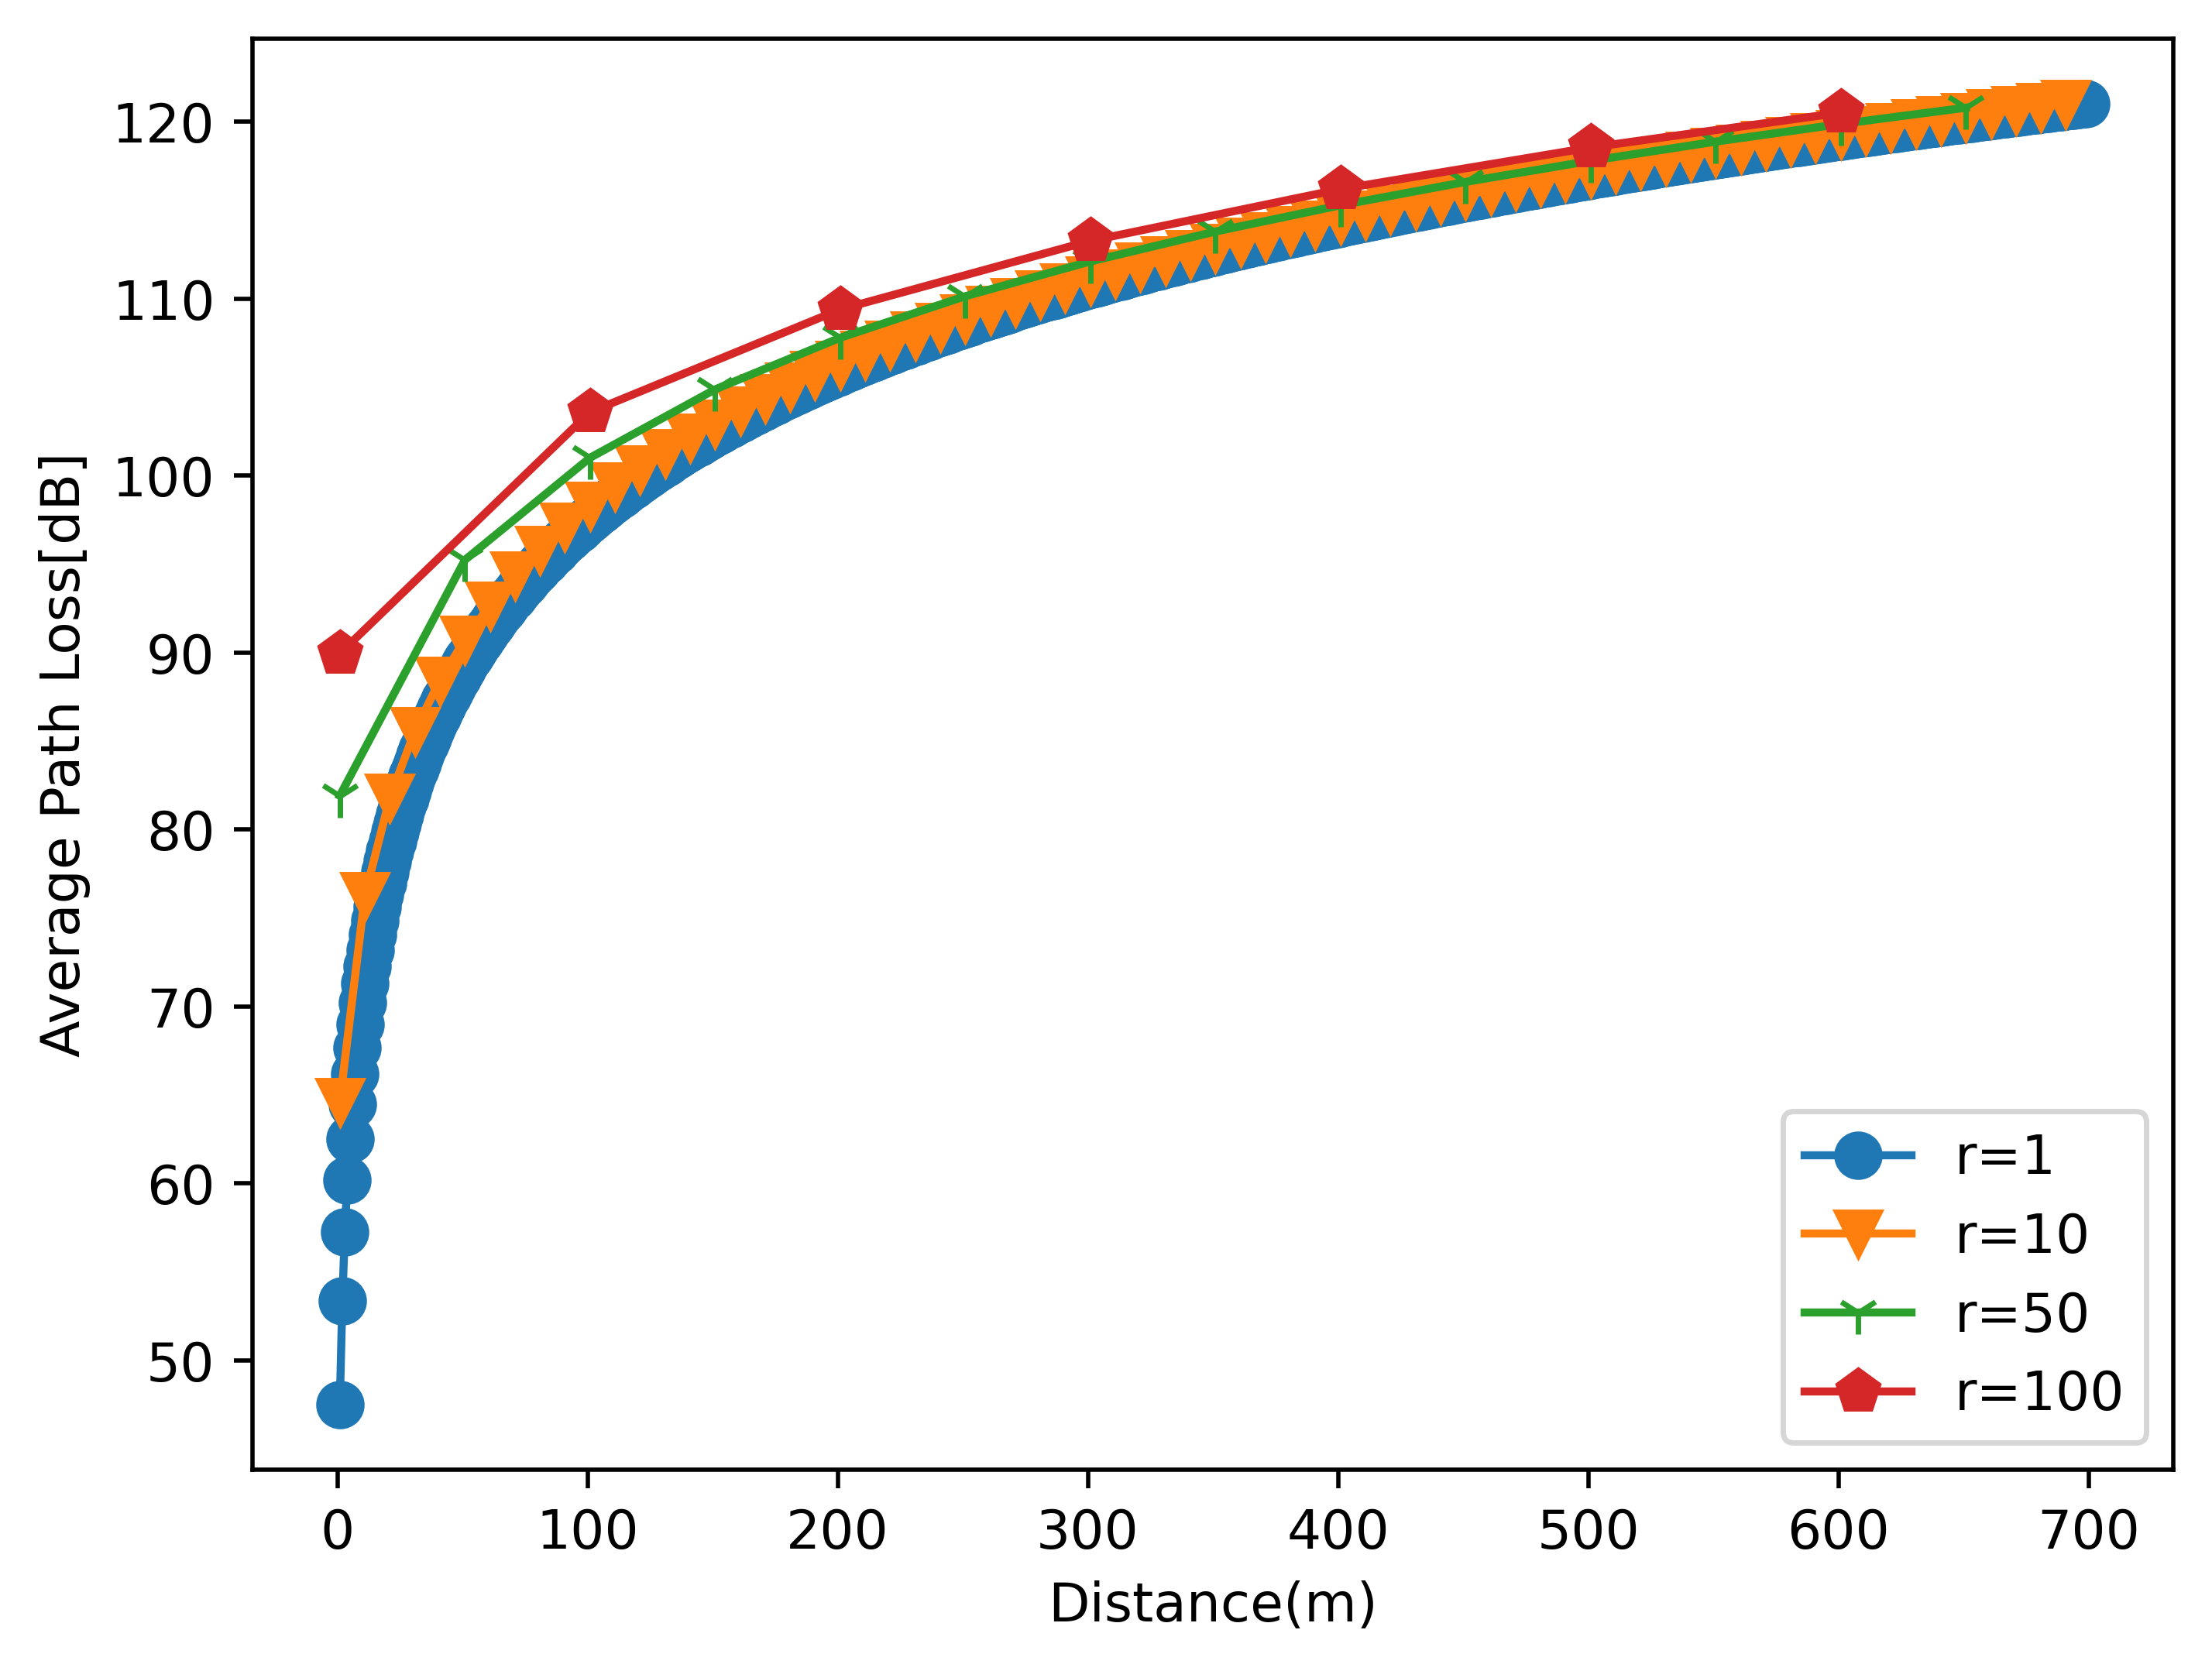

In [22]:
fig = plt.figure(dpi=500)
# plt.xscale('log')
plt.xlabel('Distance(m)')
plt.ylabel('Average Path Loss[dB]')
plt.plot(r1.keys(), r1.values(), marker='o',markersize=8, label='r=1')
plt.plot(r10.keys(), r10.values(), marker='v',markersize=8, label='r=10')
plt.plot(r50.keys(), r50.values(), marker='1',markersize=8,    label='r=50')
plt.plot(r1h.keys(), r1h.values(), marker='p',markersize=8 , label='r=100')
plt.legend()
fig.savefig('map_precision.pdf',  dpi=500)

In [23]:
# P (p=p') = sum P(p=p' | v=v') * P(v=v')
a=0.01
distance = 74 # 1238
def cal_prob_rssi(sigma, alpha, rssi):
    results = {}
    for p_prime in range(int(rssi-100), int(rssi*1.5)):
        p1 = norm(0, sigma).cdf(p_prime*(1-alpha)-rssi)
        p2 = norm(0,sigma).cdf(p_prime*(1+alpha)-rssi)
        results[p_prime] = p2-p1
    return results
def cal_p_prob(l_r):
    total_prob = {}
    for r in l_r.values():
        results = cal_prob_rssi(3.5,0.01,r)
        for k in results:
            if k in total_prob:
                total_prob[k] += results[k]
            else:
                total_prob[k] = results[k]
    for k,v in total_prob.items():
        total_prob[k] = v/len(r1)
    return total_prob

In [24]:
# very slow
pr1 = cal_p_prob(r1)
pr10 = cal_p_prob(r10)
pr50 = cal_p_prob(r50)
pr1h = cal_p_prob(r1h)

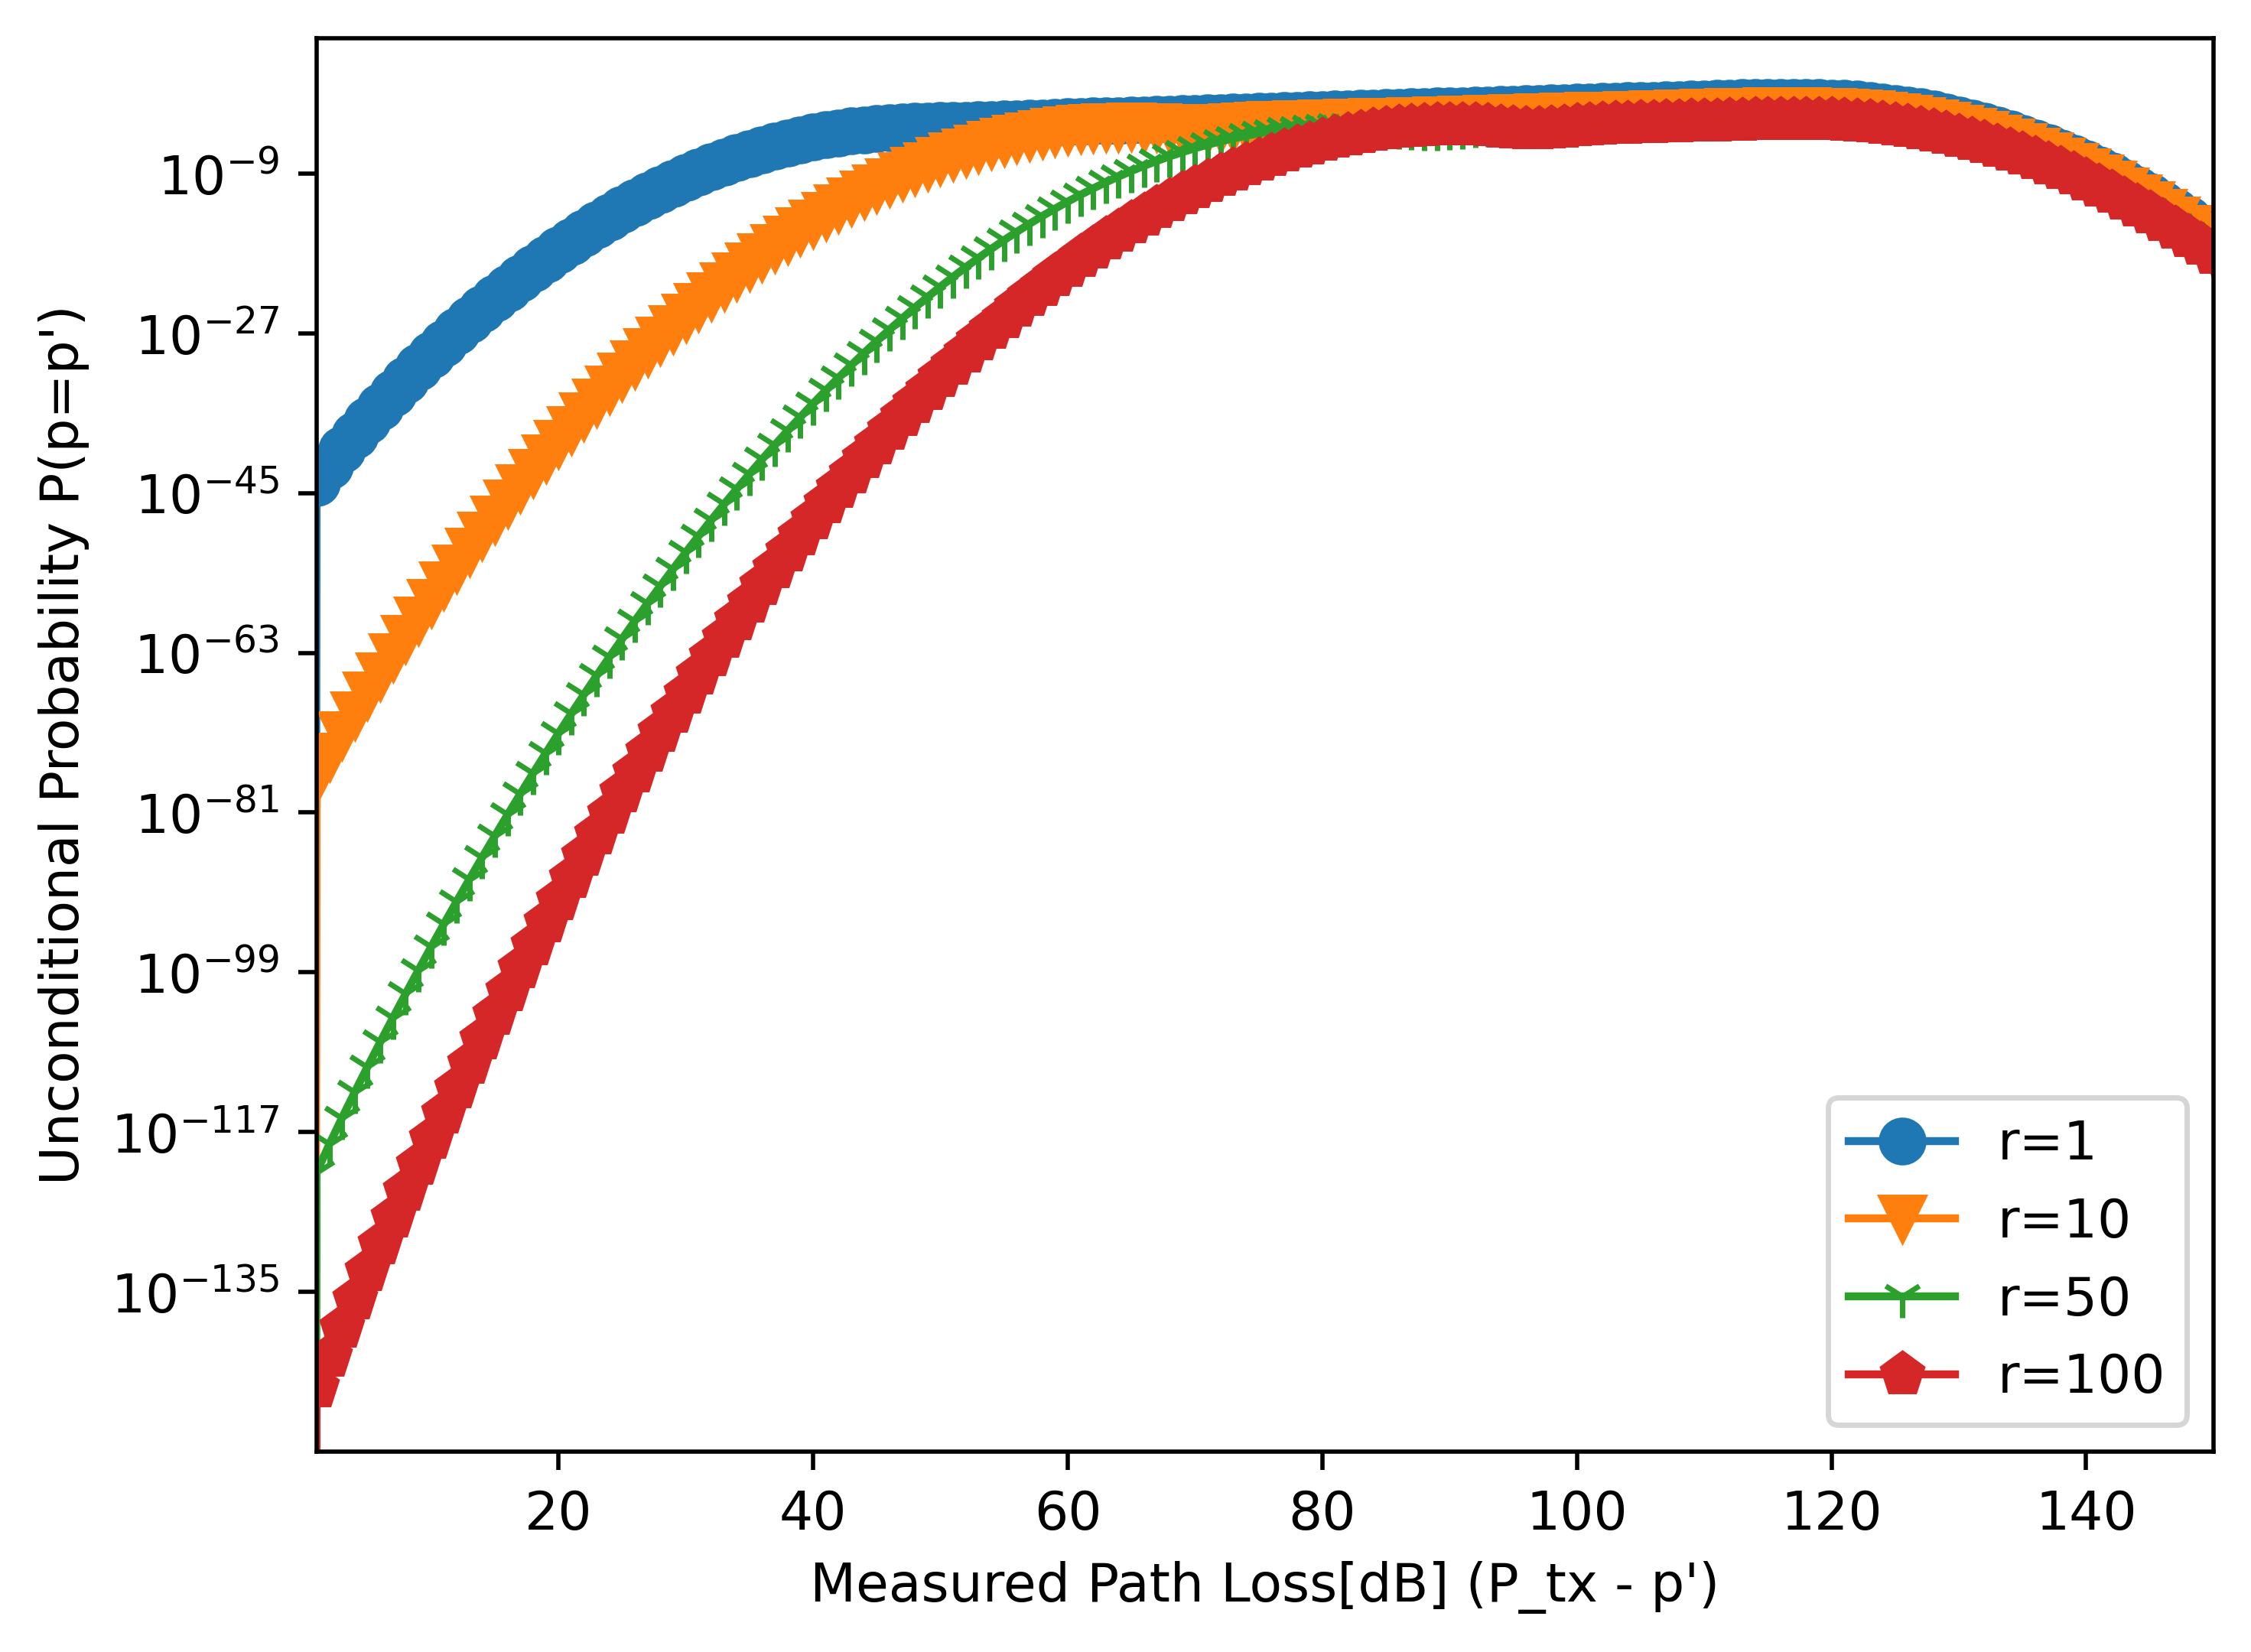

In [25]:
fig = plt.figure(dpi=500)
# plt.xscale('log')
plt.xlabel("Measured Path Loss[dB] (P_tx - p')")
plt.ylabel("Unconditional Probability P(p=p')")
plt.xlim([1,150])
plt.yscale('log')
plt.plot(pr1.keys(), pr1.values(), marker='o',markersize=8, label='r=1')
plt.plot(pr10.keys(), pr10.values(), marker='v',markersize=8, label='r=10')
plt.plot(pr50.keys(), pr50.values(), marker='1', markersize=8,   label='r=50')
plt.plot(pr1h.keys(), pr1h.values(), marker='p', markersize=8, label='r=100')
plt.legend()
fig.savefig('unconditional_power.pdf',  dpi=500)